# Part II - Ford Go Bike Dataset Exploration
## by Peter Baraka Opiyo

## Dataset Investigation Overview
> FordGoBike - The selected dataset holds information on the individual usage of a bike-sharing service from the greater San Fransisco Bay area during the month of February in the year 2019.

> Subscribers utilize the service the more than customers with their peak usage being on weekdays in the morning hours (around 6:00 am to 8:00 am) and afternoon hours (4:00 pm to 6:00 pm) with significant drops over the weekends. We may infer that most subscribers use the service to get to their work destinations and then get back home at the end of the day. We also see that subscriber trip duration is concentrated around 20 minutes and below versus customers who have longer trips (although they are fewer).

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
tripsData = pd.read_csv('./data/fordgobike_tripdata_19_clean.csv')

In [4]:
tripsData['start_time'] = pd.to_datetime(tripsData['start_time'])
tripsData['end_time'] = pd.to_datetime(tripsData['end_time'])
tripsData['start_station_id'] = tripsData['start_station_id'].astype('str')
tripsData['end_station_id'] = tripsData['end_station_id'].astype('str')
tripsData['bike_id'] = tripsData['bike_id'].astype('str')
tripsData['user_type'] = tripsData['user_type'].astype('category')
tripsData['member_gender'] = tripsData['member_gender'].astype('category')
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
tripsData['start_day'] = tripsData['start_day'].astype(weekdaycat)

tripsData.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174572 entries, 0 to 174571
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174572 non-null  int64         
 1   start_time               174572 non-null  datetime64[ns]
 2   end_time                 174572 non-null  datetime64[ns]
 3   start_station_id         174572 non-null  object        
 4   start_station_name       174377 non-null  object        
 5   start_station_latitude   174572 non-null  float64       
 6   start_station_longitude  174572 non-null  float64       
 7   end_station_id           174572 non-null  object        
 8   end_station_name         174377 non-null  object        
 9   end_station_latitude     174572 non-null  float64       
 10  end_station_longitude    174572 non-null  float64       
 11  bike_id                  174572 non-null  object        
 12  user_type       

## Hourly Service Usage on Weekdays for Customers and Subscribers

> Customers seem to have fewer trips but more longer duration trips compared to subscribers. This suggests that customers who tend to use the service (without high frequency) seem to have more varied trips compared to subscribers that almost seem to repeat their trips since majority of their trips are within 5 to 20 minutes. When we go deeper in seeing the usage, this plot shows the highest amount of trips taken by subscribers were on Thursdays at 8:00 am and 5:00 pm while it is 8:00 am on Friday and 5:00 pm on Thursday for customers.

Text(0.5, 1.015, 'Hourly Service Usage on Weekdays for Customers and Subscribers')

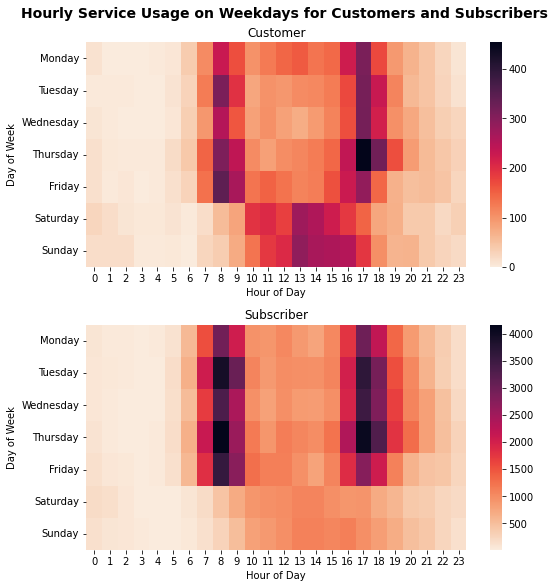

In [5]:
plt.figure(figsize=[8, 8])

plt.subplot(2, 1, 1)
customers = tripsData.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_day', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day', columns='start_hour', values='count')
sb.heatmap(ct_counts, cmap='rocket_r')
plt.title('Customer', loc='center')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()

plt.subplot(2, 1, 2)
subscribers = tripsData.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_day', 'start_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_day', columns='start_hour', values='count')
sb.heatmap(st_counts, cmap='rocket_r')
plt.title('Subscriber', loc='center')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.suptitle('Hourly Service Usage on Weekdays for Customers and Subscribers', fontsize=14, fontweight='semibold', y=1.015)

## Daily trip count for customers and subscribers

> The plot below shows that majority of the users taking trips happen to also be subscribers to the service. There is a major difference in the chart below between the user types. This is the expected difference as from part one of this exploration we have seen that subscribers are the majority on the platform and have the higher usage count. The plot mirrors the usage per hour chart. The customers usage also mirrors the basic trend of usage per hour only at a lower capacity.

Text(0.5, 1.015, 'Daily trip count for customers and subscribers')

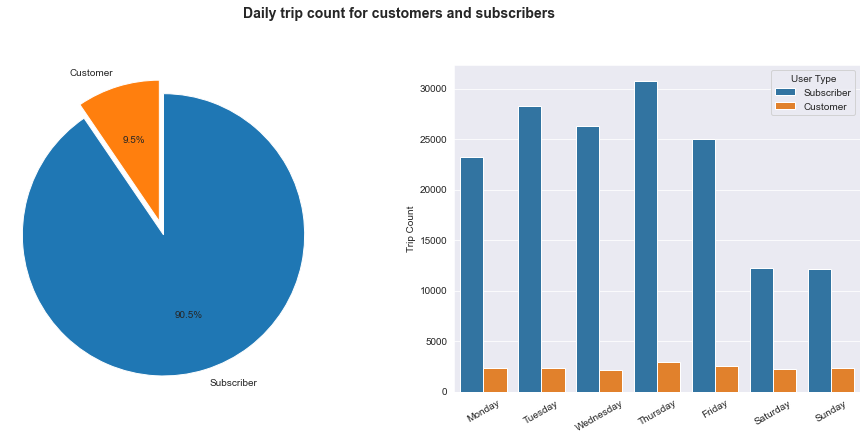

In [6]:
plt.figure(figsize=[16, 6])
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

plt.subplot(1, 2, 1)
sortedValues = tripsData.user_type.value_counts()/tripsData.shape[0]
plt.pie(sortedValues, explode=[0, 0.1], labels=sortedValues.index, startangle=90, counterclock=False, autopct='%1.1f%%')
plt.axis('square')

plt.subplot(1, 2, 2)
ax = sb.countplot(data=tripsData, x='start_day', hue='user_type', hue_order=sortedValues.index)
ax.legend(title='User Type')
plt.xticks(rotation=30)
plt.xlabel('')
plt.ylabel('Trip Count')
plt.suptitle('Daily trip count for customers and subscribers', fontsize=14, fontweight='bold', y=1.015)

## Hourly trip count for customers and subscribers

> The chart below narrows down on what the daily trip count chart showed as it picks out the hourly utilization of the service.

Text(0.5, 1.015, 'Hourly trip count for customers and subscribers')

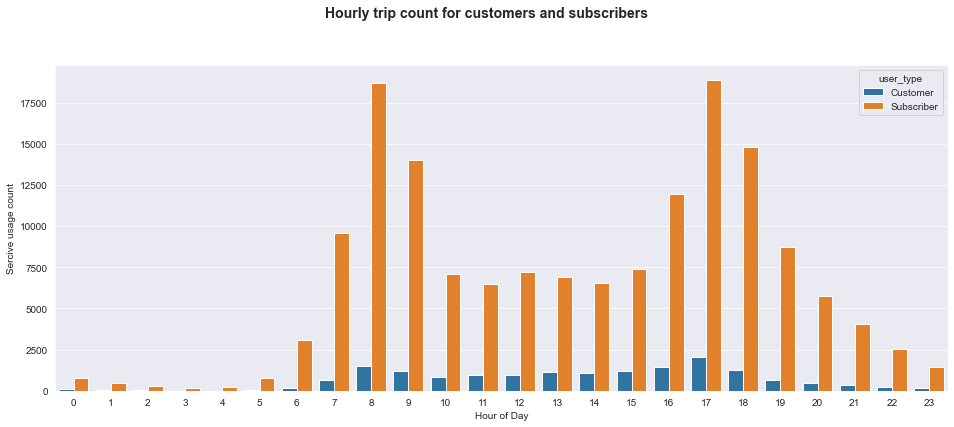

In [7]:
plt.figure(figsize=[16, 6])
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')
sb.countplot(data=tripsData, x='start_hour', hue='user_type', order=tripsData['start_hour'].value_counts().index.sort_values())
plt.xlabel('Hour of Day')
plt.ylabel('Sercive usage count')
plt.suptitle('Hourly trip count for customers and subscribers', fontsize=14, fontweight='bold', y=1.015)